In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
#loading data
df = pd.read_csv('netflix_titles.csv')
df.iloc[5453:5458,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5453,s5454,Movie,Sebastian Maniscalco: Stay Hungry,Rik Reinholdtsen,Sebastian Maniscalco,United States,"January 15, 2019",2019,TV-MA,65 min,Stand-Up Comedy,Sebastian Maniscalco brings an acerbically uni...
5454,s5455,Movie,Sebastian Maniscalco: What's Wrong with People?,Manny Rodriguez,Sebastian Maniscalco,United States,"September 17, 2019",2012,TV-MA,76 min,Stand-Up Comedy,With his uproarious tirade on modern behavior ...
5455,s5456,Movie,Sebastian Maniscalco: Why Would You Do That,Joe DeMaio,Sebastian Maniscalco,United States,"August 6, 2019",2016,TV-MA,63 min,Stand-Up Comedy,Sebastian Maniscalco delivers an expressive st...
5456,s5457,TV Show,Second 20s,NaN,"Choi Ji-woo, Lee Sang-yun, Choi Won-young, Kim...",South Korea,"October 16, 2019",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","Facing major changes, a mother realizes it's t..."
5457,s5458,Movie,Secret,Jay Chou,"Jay Chou, Lun-Mei Kwai, Anthony Wong Chau-Sang...","Hong Kong, Taiwan","July 1, 2018",2007,TV-PG,101 min,"Dramas, International Movies, Music & Musicals",Enchanted by a pretty pianist and the haunting...


In [3]:
# a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
#statistical summary of the dataframe
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s4585,Movie,The Great Train Robbery,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [5]:
#checking number of unique entries/observations
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [6]:
#checking for missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

'''
**if we are to drop all nan values,I think we will be missing a lot of data 2,000+ out 7,000 (especially movie titles) based on the director column. i think we can just fill it with unknown or drop the director and cast column. the country and ratings column are needed for eda**.

**P.S: I dropped rows with missing country and rating values**
'''

In [7]:
#filling nan values for different columns
df['director']=df['director'].fillna('unknown')
df['cast']=df['cast'].fillna('unknown')
df['date_added']=df['date_added'].fillna('not specified')

#dropping rows with missing columns 
df.dropna(subset=['country','rating'], axis=0, inplace= True)

In [9]:
#checking to see if all nan values have been replaced
df.isnull().sum() 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7274 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7274 non-null   object
 1   type          7274 non-null   object
 2   title         7274 non-null   object
 3   director      7274 non-null   object
 4   cast          7274 non-null   object
 5   country       7274 non-null   object
 6   date_added    7274 non-null   object
 7   release_year  7274 non-null   int64 
 8   rating        7274 non-null   object
 9   duration      7274 non-null   object
 10  listed_in     7274 non-null   object
 11  description   7274 non-null   object
dtypes: int64(1), object(11)
memory usage: 996.8+ KB


## Exploratory Data Analysis

In [10]:
#creating a new dataframe called rating_count
rating_count=pd.DataFrame(df['rating'].value_counts()).reset_index(inplace=False) 
rating_count.columns=['rating','count']
rating_count

,rating,count
0,TV-MA,2704
1,TV-14,1795
2,TV-PG,741
3,R,663
4,PG-13,383
5,PG,244
6,TV-Y7,221
7,TV-Y,210
8,TV-G,177
9,NR,84


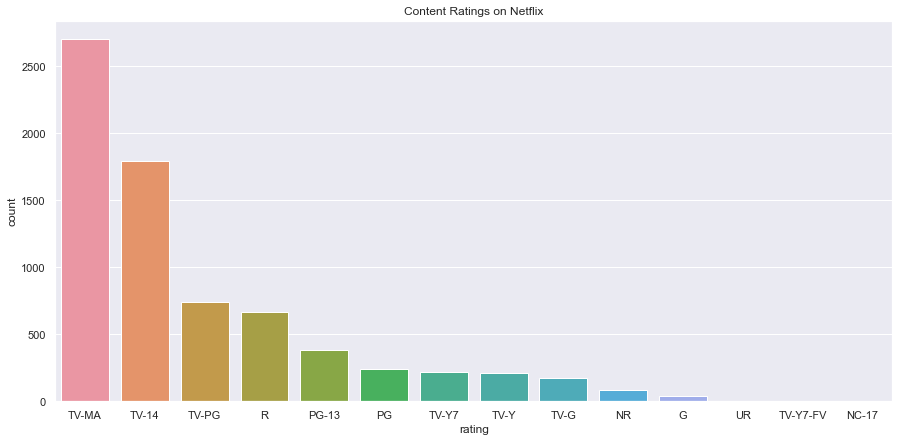

In [11]:
#visualizing the ratings on the netflix dataset
sns.set(rc={'figure.figsize':(15,7)})
ax=sns.barplot(data=rating_count,x='rating',y='count')
ax.set_title("Content Ratings on Netflix")
plt.savefig('Content Ratings.png')

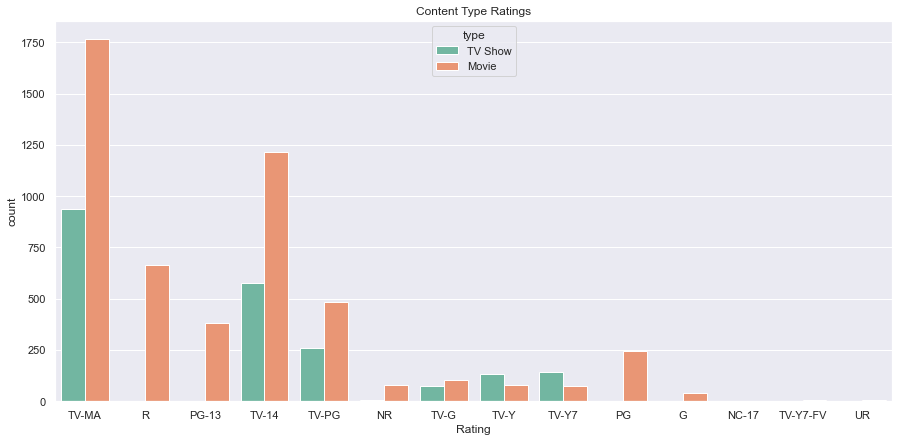

In [12]:
#Checking the content types in each rating 
sns.set_style(style = 'whitegrid')
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.countplot(data = df, x= 'rating',hue = 'type', palette='Set2')
ax.set_title('Content Type Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('count');

From the data it shows that a larger percentage of movies and TV shows on netflix are rated TV-MA (i.e. contain  graphic sexual contents,graphic violence and foul languages.

In [13]:
#creating a new dataframe and splitting the country column to contain one country for each movie/Tv show
countries =df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries.sample(50)

title
Misfit                                                  Netherlands
Birdshot                                                      Qatar
Curtiz                                                      Hungary
Nang Nak                                                   Thailand
Quiet Victory: The Charlie Wedemeyer Story            United States
Jack Taylor                                           United States
Undefeated                                            United States
Monster High: Frights, Camera, Action!                United States
Once Upon a Time in London                           United Kingdom
Teasing Master Takagi-san                                     Japan
Walk. Ride. Rodeo.                                    United States
Married at First Sight                                United States
Kismat Konnection                                             India
Come and Find Me                                     United Kingdom
Deewana Main Deewana                      

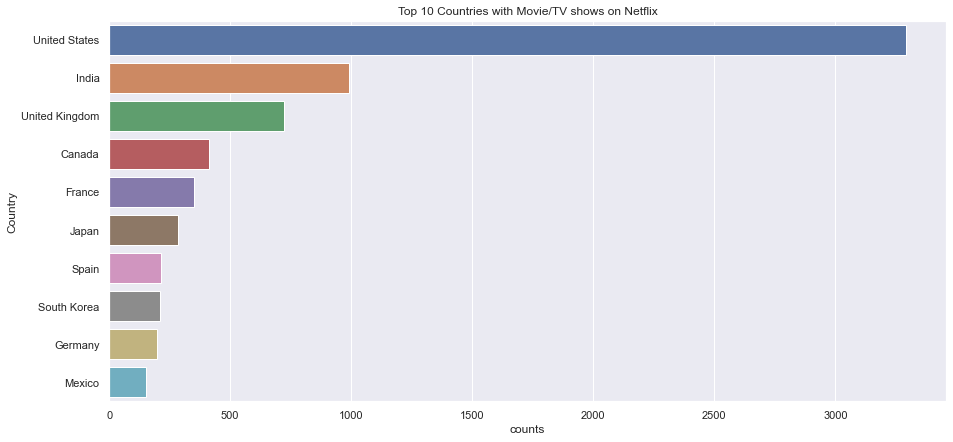

In [14]:
#visualizing countries with highest tv/movie production
ax=sns.countplot(y=countries,order=countries.value_counts().index[:10])
ax.set_title('Top 10 Countries with Movie/TV shows on Netflix')
ax.set_xlabel('counts')
ax.set_ylabel('Country');

The above visualisation shows the top ten countries whose productions are featured on Netflix with the United States having the highest number of productions being featured

In [15]:
#Categories of content mostly shown on Netflix
category=df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
category

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zubaan                                           Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 16053, dtype: object

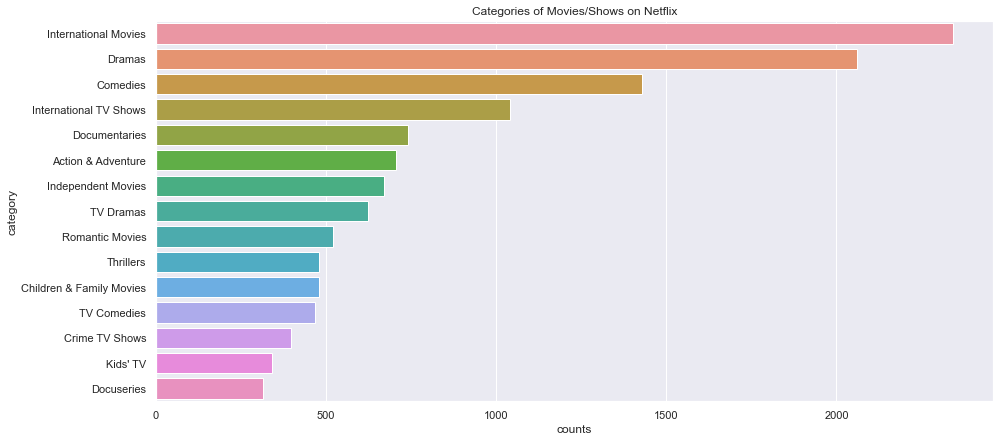

In [16]:
#visualizing categories of movies mostly shown on Netflix
ax=sns.countplot(y=category,order=category.value_counts().index[:15])
ax.set_title('Categories of Movies/Shows on Netflix')
ax.set_xlabel('counts')
ax.set_ylabel('category');


International movies are mostly shown on netflix.This is followed by Dramas and Comedies.The reason is because there are currently more Netflix subscribers internationally than within USA.

As the rules of supply and demand go, it implies that there ought to be a greater proportion of films that satisfy international audiences.

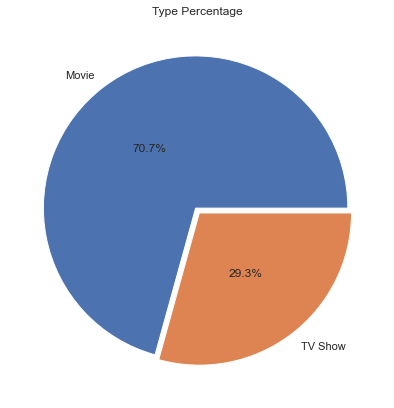

In [17]:
#giving the percentage value of contents shown on Netflix
Content_type = df['type'].value_counts(normalize=True)*100
Content_type

#visualising using a pie chart
labels = Content_type.keys() # get labels from perc
plt.pie(x=Content_type, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Type Percentage");

69.1% of Netflix content are movies while 30.9% are TV shows

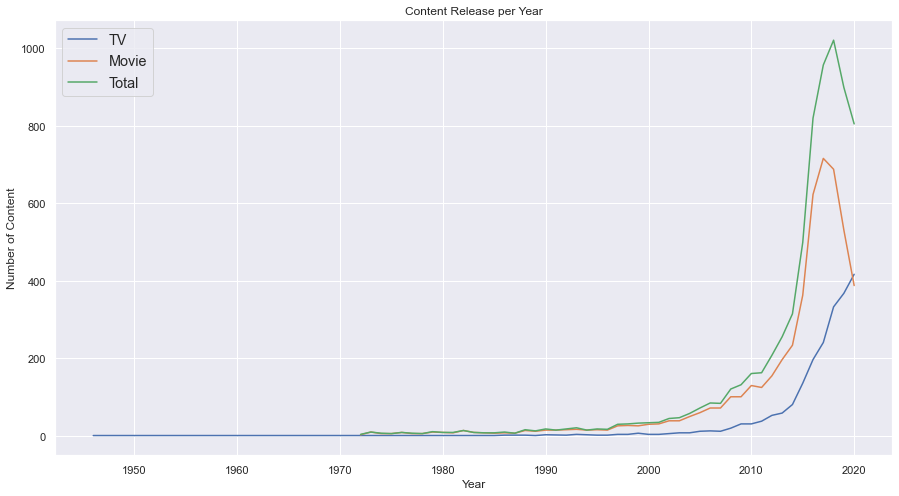

In [18]:
df_1= df[df['type'] == 'TV Show'].groupby('release_year').count()[-50:-1]
df_2 =df[df['type'] == 'Movie'].groupby('release_year').count()[-50:-1]
df_3 =df.groupby('release_year').count()[-50:-1]


plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
sns.lineplot(data = df_1['show_id'],palette = 'Set2')
sns.lineplot(data = df_2['show_id'],palette = 'Set2')
sns.lineplot(data = df_3['show_id'],palette = 'Set2')
plt.title('Content Release per Year')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.legend(['TV', 'Movie','Total'], fontsize='large');

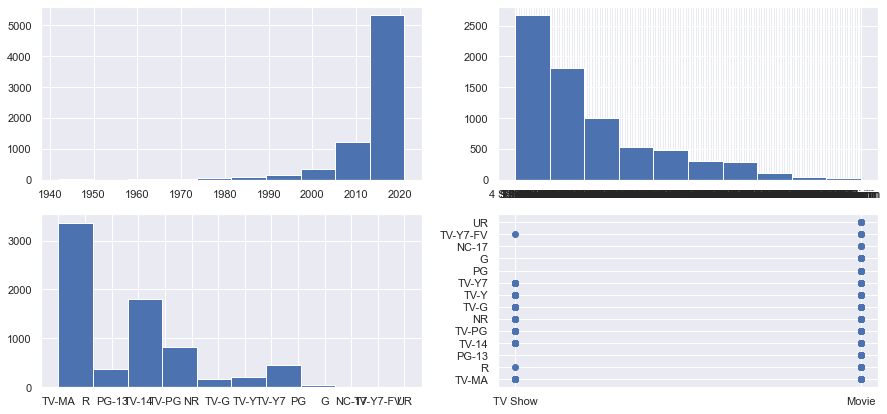

In [19]:
fig, axes =plt.subplots(2,2)
axes[0,0].hist(df['release_year'])
axes[0,1].hist(df['duration'])
axes[1,0].hist(df['rating'])
axes[1,1].scatter(df['type'],df['rating']);

In [20]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

In [21]:
df['description'] = df['description'].fillna('')

In [22]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])
tfidf_matrix.shape

(7274, 17295)

In [23]:
cosine_similarity = linear_kernel(tfidf_matrix,tfidf_matrix)

In [24]:
movies = df[['title']]

In [25]:
movies.head()

,title
0,3%
1,7:19
2,23:59
3,9
4,21


In [26]:
movies = pd.Series(df.index,index=df['title'])
movies.head()

title
3%       0
7:19     1
23:59    2
9        3
21       4
dtype: int64

In [27]:
def get_movie_recommendations(title, cosine_similarity=cosine_similarity):
    index=movies[title]
    similarity_scores=list(enumerate(cosine_similarity[index]))
    similarity_scores=sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    similarity_scores=similarity_scores[1:11]
    movie_indices = [i[0] for i in similarity_scores]
    return df['title'].iloc[movie_indices]

In [28]:
get_movie_recommendations('Spider-Man: Into the Spider-Verse')

7584                       When They See Us
1428                            Cloverfield
4923                                 Powder
426                            Almost Happy
6204                               The Cell
4676    Oprah Presents When They See Us Now
4057                                  Metro
5030                                  Queen
4138         Miss J Contemplates Her Choice
5936                    Swearnet: The Movie
Name: title, dtype: object

### Can the above be done in such a way that it takes input from a user that can be passed into the get_movie_recommendations function and then generate recommendations 

e.g title= input("Enter a movie title: ")

### and also returns a message peradventure the user input is not available in the dataset( e.g oops! movie not availabe and then recommend some random movies) ?


### I need some help with making the line chart interactive ( content release per year so I can get the accurate year value). Thank you

-- Ronke